In [1]:
import geopandas as gpd
import osmnx as ox
import networkx as nx


C:\Users\Dalton\.gds\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Dalton\AppData\Local\Temp\ipykernel_1872\3744411122.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/late

In [2]:
graph = ox.load_graphml('C:/Users/Dalton/Desktop/School/Winter_2023/GIS_490/Assignment_3/data/graph.graphml')

In [3]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

## Task 1

#### b.1) Convert the graph to two GeoDataFrames, one containing edges and one containing the nodes

In [4]:
nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)

In [5]:
nodes

,nodeID,x,y,geometry
osmid,,,,
0,0,474471.651693,4.813048e+06,POINT (474471.652 4813047.859)
1,1,474446.659714,4.813218e+06,POINT (474446.660 4813218.049)
4,4,474465.724070,4.817570e+06,POINT (474465.724 4817570.071)
2,2,473978.436524,4.814030e+06,POINT (473978.437 4814030.307)
3,3,474305.533925,4.813547e+06,POINT (474305.534 4813546.860)
...,...,...,...,...
19787,19787,985086.134288,4.900362e+06,POINT (985086.134 4900362.375)
19788,19788,486748.068451,5.005300e+06,POINT (486748.068 5005299.982)
19789,19789,486103.495526,5.005312e+06,POINT (486103.496 5005312.082)


#### b.2) Convert the graph to two GeoDataFrames, one containing edges and one containing the nodes.

In [6]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [7]:
edges

name       length  \
u     v     key                                            
0     1     0    CABIN CREEK S.R.A. CONN #1   172.406720   
      96    0    CABIN CREEK S.R.A. CONN #1   199.893815   
            1    CABIN CREEK S.R.A. CONN #2   195.040370   
1     4     0                       PACIFIC  4982.726110   
      0     0    CABIN CREEK S.R.A. CONN #1   172.406720   
...                                     ...          ...   
19788 19789 0    E. MCMINNVILLE FRONTAGE RD   644.958312   
19789 19788 0    E. MCMINNVILLE FRONTAGE RD   644.958312   
      19790 0    E. MCMINNVILLE FRONTAGE RD   237.927444   
19791 19792 0    FOOTHILL BLVD. FRONTAGE RD   719.563780   
19792 19791 0    FOOTHILL BLVD. FRONTAGE RD   719.563780   

                                                          geometry  
u     v     key                                                     
0     1     0    LINESTRING (474471.652 4813047.859, 474471.427...  
      96    0    LINESTRING (474434.459 4812856.736, 474459.957...  
            1    LINESTRING (474434.459 4812856.736, 474451.459...  
1     4     0    LINESTRING (474446.660 4813218.049, 474441.478...  
      0     0    LINESTRING (474471.652 4813047.859, 474471.427...  
...                                                            ...  
19788 19789 0    LINESTRING (486103.496 5005312.082, 486130.563...  
19789 19788 0    LINESTRING (486103.496 5005312.082, 486130.563...  
      19790 0    LINESTRING (485932.091 5005457.706, 485939.145...  
19791 19792 0    LINESTRING (475494.479 4697925.169, 475608.321...  
19792 19791 0    LINESTRING (475494.479 4697925.169, 475608.321...  

[42508 rows x 3 columns]

#### a) How many nodes and edges does this graph have?

19793 nodes and 42508 edges

#### c) What is the coordinate reference system of the nodes GeoDataFrame?

In [8]:
nodes.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### d) List the column names in the edges GeoDataFrame.

In [9]:
edges.head()

name       length  \
u v  key                                            
0 1  0    CABIN CREEK S.R.A. CONN #1   172.406720   
  96 0    CABIN CREEK S.R.A. CONN #1   199.893815   
     1    CABIN CREEK S.R.A. CONN #2   195.040370   
1 4  0                       PACIFIC  4982.726110   
  0  0    CABIN CREEK S.R.A. CONN #1   172.406720   

                                                   geometry  
u v  key                                                     
0 1  0    LINESTRING (474471.652 4813047.859, 474471.427...  
  96 0    LINESTRING (474434.459 4812856.736, 474459.957...  
     1    LINESTRING (474434.459 4812856.736, 474451.459...  
1 4  0    LINESTRING (474446.660 4813218.049, 474441.478...  
  0  0    LINESTRING (474471.652 4813047.859, 474471.427...

In [10]:
#u, v, key, name, length, geometry

In [11]:
edges.shape

(42508, 3)

In [12]:
edges.dtypes

name          object
length       float64
geometry    geometry
dtype: object

#### e) What is the min, max, and mean edge length?

In [13]:
edges['length'].min()

1.370217966253487

In [14]:
edges['length'].max()

21730.128883116628

In [15]:
edges['length'].mean()

674.3728080973483

Edges min = 1.3702, edges max = 21730.1289, edges mean = 674.3728

f) Produce and customize a plot showing the Oregon Highway Network using the ox.plot_graph function.


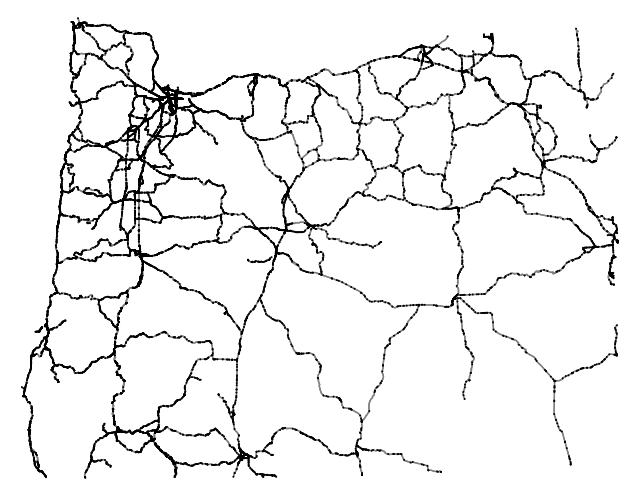

In [16]:
# Plot map
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='black', edge_color='grey', node_size=2)

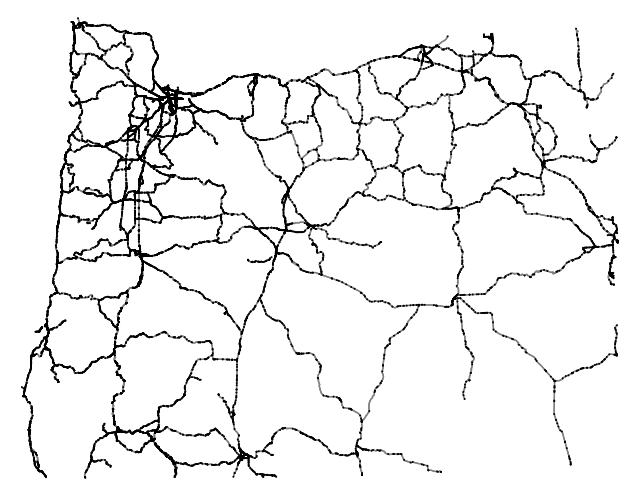

In [17]:
fig, Or_highways = ox.plot_graph(graph, bgcolor='white', node_color='black', edge_color='grey', node_size=2)

## Task 2

In [18]:
cities = gpd.read_file('C:/Users/Dalton/Desktop/School/Winter_2023/GIS_490/Assignment_3/data/oregon_cities/oregon_cities.shp')

In [19]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### a) Reproject the city GeoDataFrame to UTM Zone 10 N.

In [20]:
cities_repro = cities.to_crs('EPSG:32610')

In [21]:
cities_repro.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
cities_repro.head

<bound method NDFrame.head of                    City    lat     lon                        geometry
0    Adair Village city  44.67 -123.22  POINT (482561.392 4946316.184)
1                 Adams  45.77 -118.56  POINT (845212.127 5078087.252)
2                Adrian  43.74 -117.07  POINT (977541.425 4860113.062)
3                Albany  44.63 -123.10  POINT (492067.910 4941854.290)
4                 Aloha  45.49 -122.87  POINT (510158.282 5037393.753)
..                  ...    ...     ...                             ...
372        Wood Village  45.54 -122.42  POINT (545281.434 5043103.988)
373            Woodburn  45.15 -122.86  POINT (511005.313 4999623.251)
374             Yachats  44.31 -124.10  POINT (412268.825 4906893.114)
375             Yamhill  45.34 -123.19  POINT (485113.923 5020738.776)
376            Yoncalla  43.60 -123.29  POINT (476593.869 4827488.132)

[377 rows x 4 columns]>

#### b) Choose four cities in Oregon (the more spread out the better!) and compute the Euclidean distance (in km) between each pair.


Cities will be Eugene, Portland, Bend, Florence

In [23]:
eugene = cities_repro[cities_repro['City'] == 'Eugene'].reset_index()
bend = cities_repro[cities_repro['City'] == 'Bend'].reset_index()
portland = cities_repro[cities_repro['City'] == 'Portland'].reset_index()
florence = cities_repro[cities_repro['City'] == 'Florence'].reset_index()

In [24]:
eugene_bend_euc = eugene.distance(bend).values[0] / 1000

In [25]:
eugene_bend_euc

144.97607871968486

In [26]:
eugene_portland_euc = eugene.distance(portland).values[0] / 1000

In [27]:
eugene_portland_euc

168.5528659345418

In [28]:
eugene_florence_euc = eugene.distance(florence).values[0] / 1000

In [29]:
eugene_florence_euc

79.72147287592776

In [30]:
bend_portland_euc = bend.distance(portland).values[0] / 1000

In [31]:
bend_portland_euc

195.61318090009243

In [32]:
bend_florence_euc = bend.distance(florence).values[0] / 1000

In [33]:
bend_florence_euc

224.53011545412136

In [34]:
portland_florence_euc = portland.distance(florence).values[0] / 1000

In [35]:
portland_florence_euc

207.34848833251576

Eugene to Bend = 144.98 km, Eugene to Portland = 168.55 km, Eugene to Florence = 79.72 km, Bend to Portland = 195.61, Bend to Florence = 224.53 km,
Portland to Florence = 207.35 km

#### c) List the nearest node for each of the four cities.

In [36]:
#orig_node = ox.distance.nearest_nodes(graph_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)

In [37]:
#orig_xy = [condon_hall['centroid'].y.values[0], condon_hall['centroid'].x.values[0]]


#### Eugene

In [38]:
# Get coordinates of Eugene
Eugene_Co = cities_repro[cities_repro['City'] == 'Eugene'].reset_index()

In [39]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, MultiLineString

In [40]:
# Centriod of Eugene
Eugene_Co['centroid'] = Eugene_Co['geometry'].apply(
 lambda x: x.centroid if type(x) == Polygon else (
 x.centroid if type(x) == MultiPolygon else x))

In [41]:
# Get x and y coordinates of Eugene
Eugene_xy = [Eugene_Co['centroid'].y.values[0], Eugene_Co['centroid'].x.values[0]]

In [42]:
print(Eugene_xy)

[4878543.942920262, 490388.80726763327]


In [43]:
# Find the node in the graph that is closest to the origin point (eugene)
Eugene_closest_node = ox.distance.nearest_nodes(graph, X=Eugene_xy[1], Y=Eugene_xy[0], return_dist=False)

# Find the node in the graph that is closest to the target point
#target_node = ox.distance.nearest_nodes(graph_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [44]:
Eugene_closest_node

5888

#### Bend

In [45]:
# Get coordinates of Bend
bend_Co = cities_repro[cities_repro['City'] == 'Bend'].reset_index()

In [46]:
# Centriod of Bend
bend_Co['centroid'] = bend_Co['geometry'].apply(
 lambda x: x.centroid if type(x) == Polygon else (
 x.centroid if type(x) == MultiPolygon else x))

In [47]:
# Get x and y coordinates of Bend
bend_xy = [bend_Co['centroid'].y.values[0], bend_Co['centroid'].x.values[0]]

In [48]:
print(bend_xy)

[4879925.37734699, 635358.3041966801]


In [49]:
# Find the node in the graph that is closest to the origin point (bend)
bend_closest_node = ox.distance.nearest_nodes(graph, X=bend_xy[1], Y=bend_xy[0], return_dist=False)

In [50]:
bend_closest_node

14709

#### portland

In [51]:
# Get coordinates of portland
portland_Co = cities_repro[cities_repro['City'] == 'Portland'].reset_index()

In [52]:
# Centriod of Portland
portland_Co['centroid'] = portland_Co['geometry'].apply(
 lambda x: x.centroid if type(x) == Polygon else (
 x.centroid if type(x) == MultiPolygon else x))

In [53]:
# Get x and y coordinates of Portland
portland_xy = [portland_Co['centroid'].y.values[0], portland_Co['centroid'].x.values[0]]

In [54]:
print(portland_xy)

[5042999.972456336, 527325.008533838]


In [55]:
# Find the node in the graph that is closest to the origin point (portland)
portland_closest_node = ox.distance.nearest_nodes(graph, X=portland_xy[1], Y=portland_xy[0], return_dist=False)

In [56]:
portland_closest_node

16881

#### florence

In [57]:
# Get coordinates of florence
florence_Co = cities_repro[cities_repro['City'] == 'Florence'].reset_index()

In [58]:
# Centriod of florence
florence_Co['centroid'] = florence_Co['geometry'].apply(
 lambda x: x.centroid if type(x) == Polygon else (
 x.centroid if type(x) == MultiPolygon else x))

In [59]:
# Get x and y coordinates of florence
florence_xy = [florence_Co['centroid'].y.values[0], florence_Co['centroid'].x.values[0]]

In [60]:
print(florence_xy)

[4871361.019215841, 410991.5853731378]


In [61]:
# Find the node in the graph that is closest to the origin point (florence)
florence_closest_node = ox.distance.nearest_nodes(graph, X=florence_xy[1], Y=florence_xy[0], return_dist=False)

In [62]:
florence_closest_node

18079

#### eugene = 5888, bend = 14709, portland = 16881, florence = 18079

#### d) What is the shortest path length (i.e. nx.shortest_path_length) between three pairs of cities (in km)?

In [63]:
# Eugene-Bend, Eugene-Portland, Eugene-Florence

In [64]:
#eugene-bend length meter
eugene_bend_length_m = nx.shortest_path_length(G=graph, source=Eugene_closest_node, target=bend_closest_node, weight='length')

IndexError: tuple index out of range

In [ ]:
#eugene-bend length km
eugene_bend_length_km = eugene_bend_length_m / 1000

In [ ]:
#eugene-bend route
eugene_bend_route = nx.shortest_path(G=graph, source=Eugene_closest_node, target=bend_closest_node, weight='length')

In [ ]:
#eugene-portland length meter
eugene_portland_length_m = nx.shortest_path_length(G=graph, source=Eugene_closest_node, target=bend_closest_node, weight='length')

In [ ]:
#eugene-portland length km
eugene_portland_length_km = eugene_portland_length_m / 1000

In [ ]:
#eugene-portland route
eugene_portland_route = nx.shortest_path(G=graph, source=Eugene_closest_node, target=portland_closest_node, weight='length')

In [ ]:
#eugene-florence length meter
eugene_florence_length_m = nx.shortest_path_length(G=graph, source=Eugene_closest_node, target=florence_closest_node, weight='length')

In [ ]:
#eugene-florence length km
eugene_florence_length_km = eugene_florence_length_m / 1000

In [ ]:
#eugene-florence route
eugene_florence_route = nx.shortest_path(G=graph, source=Eugene_closest_node, target=florence_closest_node, weight='length')

# The Strugle

In [65]:
nodes

,nodeID,x,y,geometry
osmid,,,,
0,0,474471.651693,4.813048e+06,POINT (474471.652 4813047.859)
1,1,474446.659714,4.813218e+06,POINT (474446.660 4813218.049)
4,4,474465.724070,4.817570e+06,POINT (474465.724 4817570.071)
2,2,473978.436524,4.814030e+06,POINT (473978.437 4814030.307)
3,3,474305.533925,4.813547e+06,POINT (474305.534 4813546.860)
...,...,...,...,...
19787,19787,985086.134288,4.900362e+06,POINT (985086.134 4900362.375)
19788,19788,486748.068451,5.005300e+06,POINT (486748.068 5005299.982)
19789,19789,486103.495526,5.005312e+06,POINT (486103.496 5005312.082)


In [66]:
nodes.iloc[1:10]

,nodeID,x,y,geometry
osmid,,,,
1,1,474446.659714,4.813218e+06,POINT (474446.660 4813218.049)
4,4,474465.724070,4.817570e+06,POINT (474465.724 4817570.071)
2,2,473978.436524,4.814030e+06,POINT (473978.437 4814030.307)
3,3,474305.533925,4.813547e+06,POINT (474305.534 4813546.860)
16888,16888,474512.793244,4.817899e+06,POINT (474512.793 4817899.420)
5,5,474587.224709,4.817822e+06,POINT (474587.225 4817821.543)
6,6,474594.518627,4.818099e+06,POINT (474594.519 4818099.102)
243,243,474601.838001,4.817819e+06,POINT (474601.838 4817818.763)
17004,17004,475376.490447,4.819415e+06,POINT (475376.490 4819414.776)


In [67]:
# Find the ten most northerly cities in Oregon
nodes_sort = nodes.sort_values(by='osmid', ascending=True)

In [68]:
nodes_sort.head

<bound method NDFrame.head of       nodeID              x             y                        geometry
osmid                                                                    
0          0  474471.651693  4.813048e+06  POINT (474471.652 4813047.859)
1          1  474446.659714  4.813218e+06  POINT (474446.660 4813218.049)
2          2  473978.436524  4.814030e+06  POINT (473978.437 4814030.307)
3          3  474305.533925  4.813547e+06  POINT (474305.534 4813546.860)
4          4  474465.724070  4.817570e+06  POINT (474465.724 4817570.071)
...      ...            ...           ...                             ...
19788  19788  486748.068451  5.005300e+06  POINT (486748.068 5005299.982)
19789  19789  486103.495526  5.005312e+06  POINT (486103.496 5005312.082)
19790  19790  485932.090760  5.005458e+06  POINT (485932.091 5005457.706)
19791  19791  475494.478782  4.697925e+06  POINT (475494.479 4697925.169)
19792  19792  475856.821534  4.698377e+06  POINT (475856.822 4698376.962)

[19793 

In [69]:
nodes_sort.iloc[14700:14710]

,nodeID,x,y,geometry
osmid,,,,
14700,14700,518065.866923,5.011574e+06,POINT (518065.867 5011573.810)
14701,14701,478874.454724,4.904733e+06,POINT (478874.455 4904733.212)
14702,14702,502711.561672,5.016329e+06,POINT (502711.562 5016328.857)
14703,14703,507107.464986,5.018100e+06,POINT (507107.465 5018099.825)
14704,14704,635218.532314,4.885388e+06,POINT (635218.532 4885388.487)
14705,14705,635519.979517,4.884787e+06,POINT (635519.980 4884786.899)
14706,14706,503078.539994,5.016319e+06,POINT (503078.540 5016319.255)
14707,14707,634753.437194,4.875969e+06,POINT (634753.437 4875968.619)
14708,14708,634738.386647,4.875622e+06,POINT (634738.387 4875621.597)


In [71]:
#14709 is b 5888 is e

In [72]:
nodes_sort.iloc[5880:5890]

,nodeID,x,y,geometry
osmid,,,,
5880,5880,558130.117959,5.009907e+06,POINT (558130.118 5009907.385)
5881,5881,550213.723811,5.022872e+06,POINT (550213.724 5022872.347)
5882,5882,550486.993554,5.023029e+06,POINT (550486.994 5023029.442)
5883,5883,550569.841282,5.023077e+06,POINT (550569.841 5023077.297)
5884,5884,502368.185814,4.878517e+06,POINT (502368.186 4878516.716)
5885,5885,504785.239914,4.878093e+06,POINT (504785.240 4878092.678)
5886,5886,491847.322498,4.877674e+06,POINT (491847.322 4877674.100)
5887,5887,491873.003846,4.877979e+06,POINT (491873.004 4877979.040)
5888,5888,491908.281651,4.878957e+06,POINT (491908.282 4878956.797)


In [73]:
graph.head

AttributeError: 'MultiDiGraph' object has no attribute 'head'

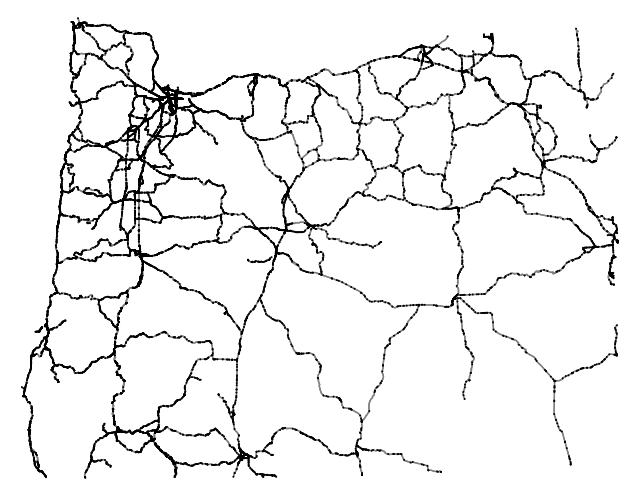

In [74]:
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='black', edge_color='grey', node_size=2)

In [75]:
length = nx.shortest_path_length(G=graph[19000], source=5888, target=14709, weight='length')

IndexError: tuple index out of range

In [ ]:
type(graph)

In [ ]:
# Calculate the shortest path
#route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')
length = nx.shortest_path_length(G=graph, source=Eugene_closest_node, target=bend_closest_node, weight='length')

In [ ]:
print(nx.__version__)

# Strugle End

#### e) Produce and customize a plot showing the routes between your three city pairs (i.e. fig, ax = ox.plot_graph_route(graph, route)).

In [ ]:
routes = [route1, route2, route3]
rc = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)

In [ ]:
#routes to be plotted
routes = [eugene_bend_route, eugene_portland_route, eugene_florence_route]

In [ ]:
# route colors
rc = ['r', 'y', 'c']

In [ ]:
#plotting routes
fig, ax = ox.plot_graph_routes(graph, routes, route_colors=rc, route_linewidth=6, node_size=0)

#### f) On average, how much longer is the network distances compared to the equivalent Euclidean distances?



In [ ]:
#eugene bend extra network distance in km
eugene_bend_extra_dist = eugene_bend_length_km - eugene_bend_euc

In [ ]:
eugene_bend_extra_dist

In [ ]:
#eugene portland extra network distance in km
eugene_portland_extra_dist = eugene_portland_length_km - eugene_portland_euc

In [ ]:
eugene_bend_extra_dist

In [ ]:
#eugene florence extra network distance in km
eugene_florence_extra_dist = eugene_florence_length_km - eugene_florence_euc

In [ ]:
eugene_bend_extra_dist

In [ ]:
#average extra network distance between the three pairs
ave_extra_dist = (eugene_bend_extra_dist + eugene_bend_extra_dist + eugene_bend_extra_dist) / 3

In [ ]:
ave_extra_dist

#### g) How long would it take to travel between your three city pairs given an average speed of 60 mph?

In [ ]:
#60mph ~ 96.5606 kmh

In [ ]:
#(total network distance between the 3 pairs) / 96.5606 
Ave_time_hours = (eugene_bend_length_km + eugene_portland_length_km + eugene_florence_length_km) / 96.5606 

In [ ]:
Ave_time_hours